# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

scikit-learn version:  0.24.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1170622
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [68 45 66 49 61 63 77 58 60 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [68 45 66 49 61 63 77 58 60 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


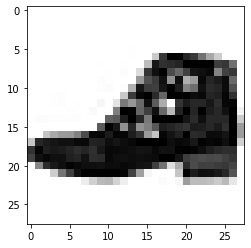

LABEL: 9
INPUT:


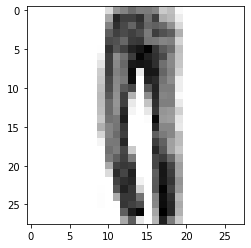

LABEL: 1
INPUT:


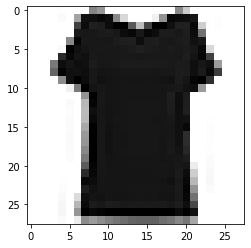

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(20,), (30,), (40,), (50,30,30), (20,20,) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)

arch = GridSearchCV(mlp, parameters, cv=5)
arch.fit(X_train,y_train)

means = arch.cv_results_['mean_test_score']
stds = arch.cv_results_['std_test_score']
params = arch.cv_results_['params']

print ('RESULTS FOR NN\n')

print('Best parameters set found: %r' %arch.best_params_)

print('Score with best parameters: %0.3f \n' %arch.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.768 

All scores on the grid:
0.728 (+/- 0.106) for {'hidden_layer_sizes': (20,)}
0.760 (+/- 0.051) for {'hidden_layer_sizes': (30,)}
0.768 (+/- 0.044) for {'hidden_layer_sizes': (40,)}
0.678 (+/- 0.211) for {'hidden_layer_sizes': (50, 30, 30)}
0.742 (+/- 0.045) for {'hidden_layer_sizes': (20, 20)}


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 110, 200, 250, 300, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp2 = MLPClassifier(hidden_layer_sizes=arch.best_params_['hidden_layer_sizes'], max_iter=250, alpha=1e-4, solver='sgd', 
                     tol=1e-4, random_state=ID, learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

arch2 = GridSearchCV(mlp2, parameters, cv=kf)
arch2.fit(X_train,y_train)

means = arch2.cv_results_['mean_test_score']
stds = arch2.cv_results_['std_test_score']
params = arch2.cv_results_['params']

print ('RESULTS FOR NN\n')

print('Best parameters set found: %r' %arch2.best_params_)

print('Score with best parameters: %0.3f \n' %arch2.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Score with best parameters: 0.775 

All scores on the grid:
0.130 (+/- 0.065) for {'batch_size': 1}
0.730 (+/- 0.070) for {'batch_size': 32}
0.760 (+/- 0.061) for {'batch_size': 110}
0.745 (+/- 0.072) for {'batch_size': 200}
0.758 (+/- 0.069) for {'batch_size': 250}
0.750 (+/- 0.102) for {'batch_size': 300}
0.775 (+/- 0.098) for {'batch_size': 480}


In [10]:
#testing different max_iter values for the best architecture

#parameters = {'max_iter': [100, 200, 400, 600, 800]}

#mlp3 = MLPClassifier(hidden_layer_sizes= arch.best_params_['hidden_layer_sizes'], alpha=1e-4, solver='sgd', tol=1e-4, 
#                     random_state=ID, learning_rate_init=.1, batch_size=arch2.best_params_['batch_size'])

#arch3 = GridSearchCV(mlp3, parameters, cv=5)
#arch3.fit(X_train,y_train)

#means = arch3.cv_results_['mean_test_score']
#stds = arch3.cv_results_['std_test_score']
#params = arch3.cv_results_['params']

#print ('RESULTS FOR NN\n')

#print('Best parameters set found: %r' %arch3.best_params_)

#print('Score with best parameters: %0.3f \n' %arch3.best_score_)

#print("All scores on the grid:")
#for mean, std, param in zip(means, stds, params):
#    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

## QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

The Neural Network model depends on its architecture and we can see that the change of the different parameters affects the results of the algorithm. We cannot say that increasing or decreasing the number layers and the number of neurons is better than the other choice, but  with different architectures the training brings to a very different results. In our case the best results is given for one hidden layers of size 40. The training with differents batch sizes highlights the importance of setting a proper value, indeed the algorithm could not converge even if is faster like in the case of bach size = 1: computing from one sample brings to a less stable trajectory.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 25.81 sec

Training MLP of size (20,) ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 43.78 sec

Training MLP of size (20, 20) ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 45.16 sec

Training MLP of size (30,) ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 48.24 sec

Training MLP of size (40,) ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 44.14 sec



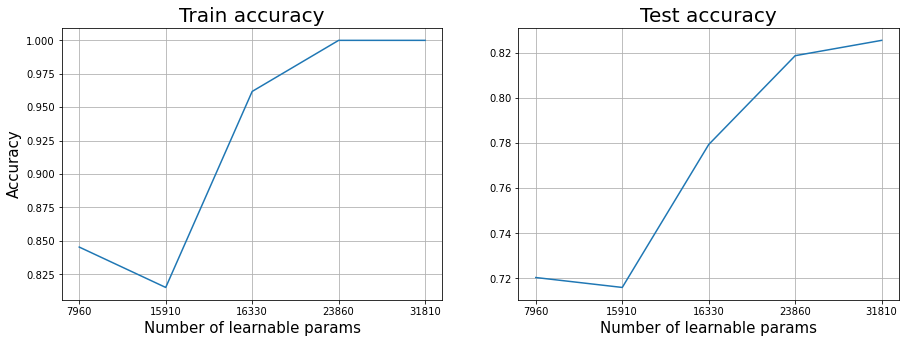

In [20]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (20,20,), (30,), (40,)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes= hl_size, max_iter=600, alpha=1e-4, solver='sgd', tol=-1, random_state=ID, 
                     learning_rate_init=.1, batch_size=arch2.best_params_['batch_size'])
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_title('Train accuracy', fontsize=20)
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params', fontsize=15)
ax[1].set_title('Test accuracy', fontsize=20)
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## QUESTION 2

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

Starting from these plots we can see the architecture with the best train and test accuracy. The train and test plots are really similar even if the test has smaller values. The architectures more complex bring to a more accurate result in the train and in the test, but we have to pay attention. While the complexity increase, the accuracy assume an higher value until the architecture is enough complex and the accuracy saturate. This is what we expected because bigger NNs give a more accurate result but with the risk of overfitting. We can see also from the models with less number of parameters that too simple architectures can lead to an underfitting with a too low prediction power.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

RESULTS FOR NN



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Training MLP with learning rate: 0.001
Score: 0.850 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Training MLP with learning rate: 0.01
Score: 1.000 

Training MLP with learning rate: 0.1
Score: 0.985 



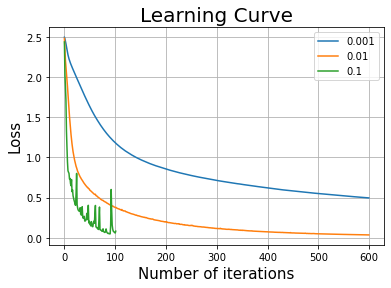

In [12]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}
#parameters = {'learning_rate_init': lr_list}

print ('RESULTS FOR NN\n')

for lr in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes= arch.best_params_['hidden_layer_sizes'], max_iter=600, alpha=1e-4, solver='sgd', 
                        tol=1e-4, random_state=ID, learning_rate_init=lr, batch_size=arch2.best_params_['batch_size'])
    mlp.fit(X_train,y_train)
    
    print('Training MLP with learning rate: {}'.format(lr))
    print('Score: %0.3f \n' %mlp.score(X_train,y_train))
    plt.plot(mlp.loss_curve_, label= str(lr))
    
plt.grid(True)
plt.title('Learning Curve', fontsize=20)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

## QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The plot of the learning curves shows two fundamental things: on one hand the increasing value of the learning rate brings to a faster convergence. However this convergence is less and less stable, just like we can see from the green curve and from its fluctuations. On the other hand, the blue curve with a too low value of the learning rate doesn't reach the convergence because require a too high number of iterations. The trade off between the two extremes is the orange one where we can see a stable curve that reach the convergence in a not too long time.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR BEST NN

Best NN training error: 0.0000
Best NN test error: 0.2170


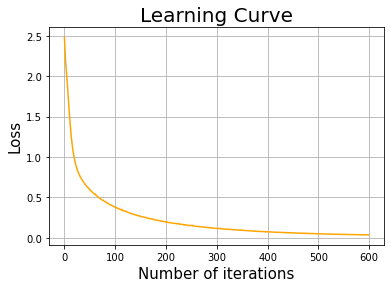

In [13]:
#get training and test error for the best NN model from CV

mlp_best = MLPClassifier(hidden_layer_sizes= arch.best_params_['hidden_layer_sizes'], max_iter=600, alpha=1e-4, solver='sgd', 
                         tol=1e-4, random_state=ID, learning_rate_init=0.01, batch_size=arch2.best_params_['batch_size'])

mlp_best.fit(X_train, y_train)
training_error = 1 - mlp_best.score(X_train, y_train)
test_error = 1 - mlp_best.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %0.4f" % training_error)
print ("Best NN test error: %0.4f" % test_error)

plt.plot(mlp_best.loss_curve_, color='orange')
plt.title('Learning Curve', fontsize=20)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid(True)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [391 388 407 431 371 430 421 372 406 383]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [15]:
# use best architecture and params from before

mlp_more = MLPClassifier(hidden_layer_sizes= arch.best_params_['hidden_layer_sizes'], max_iter=600, alpha=1e-4, solver='sgd', 
                         tol=1e-4, random_state=ID, learning_rate_init=0.01, batch_size=arch2.best_params_['batch_size'])

mlp_more.fit(X_train, y_train)
training_error = 1 - mlp_more.score(X_train, y_train)
test_error = 1 - mlp_more.score(X_test, y_test)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR NN

NN training error: 0.006250
NN test error: 0.180214


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 4]

The two results that we have obtained highlights that the same model with different numbers of data points can give distinct results. The one with m=4000 is more accurate than the other and this is as we expected because with an highter number of data the model can train itself better and more generally. This fact is underlined by the test error which is different in the two cases instead of the training one. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


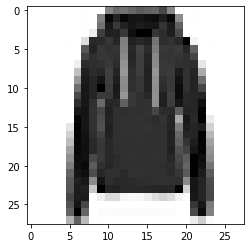

LABEL: 2
INPUT:


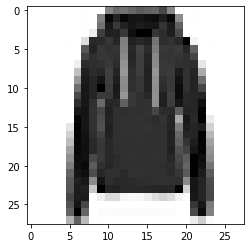

LABEL: 4


In [16]:
NN_prediction = mlp_best.predict(X_test)
large_NN_prediction = mlp_more.predict(X_test)

i = 0
while y_test[i] == NN_prediction[i] or y_test[i] != large_NN_prediction[i]: i+=1

plot_input(X_test, y_test, i)
plot_input(X_test, NN_prediction, i)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


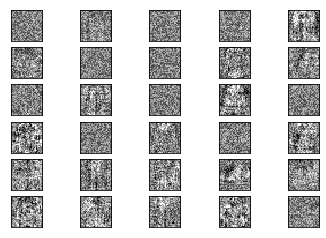

Weights with 4000 data points:


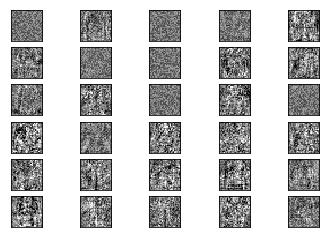

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(6, 5)
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(6, 5)
vmin, vmax = mlp_more.coefs_[0].min(), mlp_more.coefs_[0].max()
for coef, ax in zip(mlp_more.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

## [ANSWER TO QUESTION 5]

Looking at the two sets of weights we cannot see too much and they are very difficult to interpretate. We can see the shape of some clothes but it's not easy to recognize which one is because they are not very defined. The images in the second case are a little bit more clear but anyway it's very hard to see something. This shows the difficulty of intepreting and knowing how the NN (and each neuron) works and give us the right results.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

svm_best = SVC(kernel='rbf', C=5, gamma=0.005)
svm_best.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1 - svm_best.score(X_train, y_train)

print("Training error SVM: %0.4f" %SVM_training_error)

SVM_test_error = 1 - svm_best.score(X_test, y_test)
print("Test error SVM: %0.4f" %SVM_test_error)

RESULTS FOR SVM
Training error SVM: 0.0724
Test error SVM: 0.1492


In [19]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1,  max_iter=2000)
regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1 - regL2.score(X_train, y_train)
test_error = 1 - regL2.score(X_test, y_test)

print("Training error (reg): %f" % training_error)
print("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.045000
Test error (reg): 0.179400


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

## [ANSWER TO QUESTION 6]

The three models give us good results: the best one is the SVM model. The NN gives the worse result in the test set even if the error is very close to the Logistic Regression. Probably this is because the NN is not optimazied for this type of problems and if we use a more complex structure, like the convolutional NN, we could obtain a better result. The SVM with the regularitazion gives a better performance than the standard NN as we expected from the theory.